# **Hiyerarşik İndeksler**

In [6]:
import numpy as np
import pandas as pd

In [7]:
#Çoklu indekse sahip bir dataframe oluşturulım
seri=pd.Series(np.random.randn(10),index=[['a','a','a','a','b','b','a','c','c','b'],[1,2,3,5,4,6,8,4,1,1]])
seri

a  1   -0.482195
   2    0.813434
   3    4.468279
   5   -0.290412
b  4    0.731095
   6   -0.557524
a  8    2.081057
c  4    0.689024
   1   -1.363736
b  1    2.413818
dtype: float64

In [8]:
#indeks bilgilerini görmek için
seri.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('a', 5),
            ('b', 4),
            ('b', 6),
            ('a', 8),
            ('c', 4),
            ('c', 1),
            ('b', 1)],
           )

In [9]:
#'a' indekse sahip verileri görüntülemek için

seri['a']

,0
1,-0.482195
2,0.813434
3,4.468279
5,-0.290412
8,2.081057


In [10]:
#Veriyi dilimleme yapmak istersek ilk başta indeksi sıralıyoruz sonra çağırıyoruz
seri = seri.sort_index()
seri['a':'c']

a  1   -0.482195
   2    0.813434
   3    4.468279
   5   -0.290412
   8    2.081057
b  1    2.413818
   4    0.731095
   6   -0.557524
c  1   -1.363736
   4    0.689024
dtype: float64

In [11]:
# a ve c indeksine ait değerleri ekrana yazdırabilmek için

seri[['a','c']]

a  1   -0.482195
   2    0.813434
   3    4.468279
   5   -0.290412
   8    2.081057
c  1   -1.363736
   4    0.689024
dtype: float64

In [12]:
seri.loc[['a','c']]

a  1   -0.482195
   2    0.813434
   3    4.468279
   5   -0.290412
   8    2.081057
c  1   -1.363736
   4    0.689024
dtype: float64

In [13]:
#içdeki indekse ait verileri çağırmak için

seri[:,1]

,0
a,-0.482195
b,2.413818
c,-1.363736


In [14]:
#yada böyle her ana indeksin 1. iç indekse ait değeri görebiliriz. Ama önemli olan hepsinde karşıığı olmalı nan değer olmamalı

seri.loc[:,1]

,0
a,-0.482195
b,2.413818
c,-1.363736


In [15]:
#veriyi tablo halinde görmek istersek. 1. iç indeksin baktığımızda hepsine ait değeri var.

seri.unstack()

,1,2,3,4,5,6,8
a,-0.482195,0.813434,4.468279,NaN,-0.290412,NaN,2.081057
b,2.413818,NaN,NaN,0.731095,NaN,-0.557524,NaN
c,-1.363736,NaN,NaN,0.689024,NaN,NaN,NaN


In [16]:
#Tekrar eski haline döndürmek için

seri.unstack().stack()

a  1   -0.482195
   2    0.813434
   3    4.468279
   5   -0.290412
   8    2.081057
b  1    2.413818
   4    0.731095
   6   -0.557524
c  1   -1.363736
   4    0.689024
dtype: float64

In [17]:
#tablo da çoklu hiyerarşik indeksler

tablo =pd.DataFrame(np.arange(12).reshape(4,3),index=[["A","B","C","A"],[1,2,3,4]],columns=[["say","söz","say"],["mat","ede","mat"]])
tablo

,,say,söz,say
,,mat,ede,mat
A,1,0,1,2
B,2,3,4,5
C,3,6,7,8
A,4,9,10,11


In [18]:
#bu indeklerimizi isimlendirelim

tablo.index.names=["sube","no"]
tablo.columns.names = ["alan","dersler"]

tablo

,alan,say,söz,say
,dersler,mat,ede,mat
sube,no,,,
A,1,0,1,2
B,2,3,4,5
C,3,6,7,8
A,4,9,10,11


In [19]:
#Satısal değerlere ait veriler.
tablo['say']

,dersler,mat,mat
sube,no,,
A,1,0,2
B,2,3,5
C,3,6,8
A,4,9,11


In [20]:
#indeks yerlerini değiştirmek için

tablo.swaplevel("sube","no")

,alan,say,söz,say
,dersler,mat,ede,mat
no,sube,,,
1,A,0,1,2
2,B,3,4,5
3,C,6,7,8
4,A,9,10,11


In [21]:
#indeks sıralama

tablo.sort_index(level=0)

alan    say söz say
dersler mat ede mat
sube no            
A    1    0   1   2
     4    9  10  11
B    2    3   4   5
C    3    6   7   8

In [22]:
#tablo2 =tablo.set_index() foksiyonu ile belirlene sütun indeks yapılabilir.
#drop=False ayarı ile indeks olarak alınan sütun olduğu yerde kalır
#reset_index() ile verş tekrar eski haline döner.

# **Veri Birleştirme**

In [23]:
tablo1 = pd.DataFrame({"anahtar":[1,2,3,4,5,6,8,4],"kod":[3,5,4,1,2,36,5,2],"sınıf":["a","b","c","d","e","a","b","g"]})
tablo2 = pd.DataFrame({"enaktar":[1,22,3,4,5,6,81,4],"kod":[7,3,2,12,25,12,3,5],"sınıf":["a","b","z","d","d","h","a","b"]})

In [24]:
tablo1


,anahtar,kod,sınıf
0,1,3,a
1,2,5,b
2,3,4,c
3,4,1,d
4,5,2,e
5,6,36,a
6,8,5,b
7,4,2,g


In [25]:
tablo2

,enaktar,kod,sınıf
0,1,7,a
1,22,3,b
2,3,2,z
3,4,12,d
4,5,25,d
5,6,12,h
6,81,3,a
7,4,5,b


In [26]:
#tablo birleştirme "kod" sütununa göre birleştidi.

pd.merge(tablo1,tablo2)

,anahtar,kod,sınıf,enaktar
0,1,3,a,81
1,2,5,b,4
2,8,5,b,4


In [27]:
#hangi sütuna göre birleştireceğimizi elle de seçebiliriz..

pd.merge(tablo1,tablo2,on="kod")

,anahtar,kod,sınıf_x,enaktar,sınıf_y
0,1,3,a,22,b
1,1,3,a,81,a
2,2,5,b,4,b
3,5,2,e,3,z
4,8,5,b,4,b
5,4,2,g,3,z


In [28]:
#Eğer birleştireceğimiz sütun adları farklı ise

pd.merge(tablo1,tablo2,left_on="anahtar",right_on="enaktar")

,anahtar,kod_x,sınıf_x,enaktar,kod_y,sınıf_y
0,1,3,a,1,7,a
1,3,4,c,3,2,z
2,4,1,d,4,12,d
3,4,1,d,4,5,b
4,4,2,g,4,5,b
5,5,2,e,5,25,d
6,6,36,a,6,12,h
7,4,2,g,4,12,d


In [29]:
#Karşılığı olmayan değerleri yazdırmak istersek
pd.merge(tablo1,tablo2,left_on="anahtar",right_on="enaktar",how="outer")

,anahtar,kod_x,sınıf_x,enaktar,kod_y,sınıf_y
0,1.0,3.0,a,1.0,7.0,a
1,2.0,5.0,b,NaN,NaN,NaN
2,3.0,4.0,c,3.0,2.0,z
3,4.0,1.0,d,4.0,12.0,d
4,4.0,1.0,d,4.0,5.0,b
5,4.0,2.0,g,4.0,12.0,d
6,4.0,2.0,g,4.0,5.0,b
7,5.0,2.0,e,5.0,25.0,d
8,6.0,36.0,a,6.0,12.0,h
9,8.0,5.0,b,NaN,NaN,NaN


In [30]:
#Soldaki veriye göre sıralamak için
pd.merge(tablo1,tablo2,left_on="anahtar",right_on="enaktar",how="left")

,anahtar,kod_x,sınıf_x,enaktar,kod_y,sınıf_y
0,1,3,a,1.0,7.0,a
1,2,5,b,NaN,NaN,NaN
2,3,4,c,3.0,2.0,z
3,4,1,d,4.0,12.0,d
4,4,1,d,4.0,5.0,b
5,5,2,e,5.0,25.0,d
6,6,36,a,6.0,12.0,h
7,8,5,b,NaN,NaN,NaN
8,4,2,g,4.0,12.0,d
9,4,2,g,4.0,5.0,b


In [31]:
#iki tablodaki ortak değerleri almak istersek
pd.merge(tablo1,tablo2,left_on="anahtar",right_on="enaktar",how="inner")

,anahtar,kod_x,sınıf_x,enaktar,kod_y,sınıf_y
0,1,3,a,1,7,a
1,3,4,c,3,2,z
2,4,1,d,4,12,d
3,4,1,d,4,5,b
4,4,2,g,4,5,b
5,5,2,e,5,25,d
6,6,36,a,6,12,h
7,4,2,g,4,12,d


In [32]:
#Birden fazla anahtar sütunla birleştirmek
pd.merge(tablo1,tablo2,on=["kod","sınıf"])


,anahtar,kod,sınıf,enaktar
0,1,3,a,81
1,2,5,b,4
2,8,5,b,4


In [33]:
#ortak olmayan değerlerde eklensin
pd.merge(tablo1,tablo2,on=["kod","sınıf"],how="outer")

,anahtar,kod,sınıf,enaktar
0,4.0,1,d,NaN
1,5.0,2,e,NaN
2,4.0,2,g,NaN
3,NaN,2,z,3.0
4,1.0,3,a,81.0
5,NaN,3,b,22.0
6,3.0,4,c,NaN
7,2.0,5,b,4.0
8,8.0,5,b,4.0
9,NaN,7,a,1.0


In [34]:
#eğer indekse göre tabloları birleştirmek istersek

tablo1.join(tablo2, lsuffix='_eski', rsuffix='_yeni',how="outer")

,anahtar,kod_eski,sınıf_eski,enaktar,kod_yeni,sınıf_yeni
0,1,3,a,1,7,a
1,2,5,b,22,3,b
2,3,4,c,3,2,z
3,4,1,d,4,12,d
4,5,2,e,5,25,d
5,6,36,a,6,12,h
6,8,5,b,81,3,a
7,4,2,g,4,5,b


In [35]:
#3 tane tabloyu birleştirmek için
#tablo.join([tablo1,tablo2],how="outer")

In [36]:
dizi = np.arange(10).reshape(2,5)
dizi

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [37]:
#diziyi indeks bilgisi kullanmadan birleştirmek için
#axis 1 seçtiğimiz için sütun olarak birleştirir yani yanına ekler. p seçseytın altına eklerdi.
np.concatenate([dizi,dizi],axis=1)

array([[0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9, 5, 6, 7, 8, 9]])

In [38]:
veri = pd.Series([0,1], index=["a","b"])
veri2 =pd.Series([11,1,4], index=["g","c","j"])
veri3 =pd.Series([2,13], index=["h","b"])

In [39]:
#concat metodu ile veriler alt alta ekledin yan yana eklemek için axis 1 değeri vermeliyiz.
pd.concat([veri,veri2,veri3])

,0
a,0
b,1
g,11
c,1
j,4
h,2
b,13


In [40]:
#Süun olarak yana ekleyip sütunlara isim verebiliriz.
pd.concat([veri,veri2,veri3],axis=1,keys=["veri1","veri2","veri3"])

,veri1,veri2,veri3
a,0.0,NaN,NaN
b,1.0,NaN,13.0
g,NaN,11.0,NaN
c,NaN,1.0,NaN
j,NaN,4.0,NaN
h,NaN,NaN,2.0


In [41]:
vs1 = pd.DataFrame(np.random.randn(3,4),
                   index=["1","2","3"],
                   columns=["a","b","c","d"])
vs2 = pd.DataFrame(np.random.randn(3,7),
                   index=["1","2","3"],
                   columns=["a","b","c","d","e","f","g"])


In [42]:
vs1

,a,b,c,d
1,0.150483,-0.633639,-0.506302,-0.919101
2,1.051140,-0.244522,0.827174,0.135477
3,-0.246405,-0.495911,-1.483727,-0.179015


In [43]:
vs2

,a,b,c,d,e,f,g
1,-0.352672,-0.693909,1.198706,0.033944,-0.377347,-1.469075,0.202886
2,1.284024,-0.407644,0.811718,-0.004719,0.295783,0.258733,0.546139
3,0.975632,-2.910183,-1.147978,0.221929,-0.252397,0.563404,-0.084494


In [44]:
#iki dataframe i gruplayarak birleştirdik.
pd.concat([vs1,vs2],axis=0,sort=False,keys=["Grup 1","Grup 2"])
#

a         b         c         d         e         f         g
Grup 1 1  0.150483 -0.633639 -0.506302 -0.919101       NaN       NaN       NaN
       2  1.051140 -0.244522  0.827174  0.135477       NaN       NaN       NaN
       3 -0.246405 -0.495911 -1.483727 -0.179015       NaN       NaN       NaN
Grup 2 1 -0.352672 -0.693909  1.198706  0.033944 -0.377347 -1.469075  0.202886
       2  1.284024 -0.407644  0.811718 -0.004719  0.295783  0.258733  0.546139
       3  0.975632 -2.910183 -1.147978  0.221929 -0.252397  0.563404 -0.084494

In [45]:
#indeksleri olmayan tabloları birleştirme

veri= pd.DataFrame(np.random.randn(3,4),columns=["a","b","c","d"])
veri1= pd.DataFrame(np.random.randn(5,4),columns=["d","a","f","g"])

In [46]:
pd.concat([veri,veri1],ignore_index=True,sort=False)

,a,b,c,d,f,g
0,0.694611,0.056108,0.000277,1.047776,NaN,NaN
1,-1.624864,-0.812818,0.091276,0.424317,NaN,NaN
2,-0.030404,-0.477869,0.655633,0.202958,NaN,NaN
3,-0.522224,NaN,NaN,-0.530175,-0.056906,-0.691273
4,-0.196369,NaN,NaN,0.512161,-0.621309,1.392273
5,0.351890,NaN,NaN,-0.572338,-0.642519,0.677471
6,0.066951,NaN,NaN,1.235854,-0.997014,-0.961762
7,-0.361874,NaN,NaN,-0.557312,-0.427495,-0.949428


In [47]:
#Veriyi çevirmek için transpose işlemi için
veri.T

,0,1,2
a,0.694611,-1.624864,-0.030404
b,0.056108,-0.812818,-0.477869
c,0.000277,0.091276,0.655633
d,1.047776,0.424317,0.202958


In [48]:
#Veriyi uzun formata çevirmek için
uzun=veri.stack()

In [49]:
uzun.unstack()

,a,b,c,d
0,0.694611,0.056108,0.000277,1.047776
1,-1.624864,-0.812818,0.091276,0.424317
2,-0.030404,-0.477869,0.655633,0.202958


In [50]:
veri= pd.DataFrame(np.arange(16).reshape(4,4),columns=[["say","say","söz","söz"],["mat","ing","mat","ing"]],index=[["a","b","c","d"],[1,2,1,2]])
veri

say     söz    
    mat ing mat ing
a 1   0   1   2   3
b 2   4   5   6   7
c 1   8   9  10  11
d 2  12  13  14  15

In [51]:
#satırları ve sütunları iki seviyeden oluşan bir dataframe hazırladık.
veri.index.names=["sınıf","sınav"]
veri.columns.names=["alan","ders"]
veri

alan        say     söz    
ders        mat ing mat ing
sınıf sınav                
a     1       0   1   2   3
b     2       4   5   6   7
c     1       8   9  10  11
d     2      12  13  14  15

In [52]:
uzun=veri.stack()
uzun

/tmp/ipython-input-2358604020.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  uzun=veri.stack()


alan              say  söz
sınıf sınav ders          
a     1     ing     1    3
            mat     0    2
b     2     ing     5    7
            mat     4    6
c     1     ing     9   11
            mat     8   10
d     2     ing    13   15
            mat    12   14

In [53]:
uzun.unstack()

alan        say     söz    
ders        ing mat ing mat
sınıf sınav                
a     1       1   0   3   2
b     2       5   4   7   6
c     1       9   8  11  10
d     2      13  12  15  14

In [54]:
#istediğimiz indeks sırasına göre stack yapmak için

veri.stack(0)

/tmp/ipython-input-2437983563.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  veri.stack(0)


ders              mat  ing
sınıf sınav alan          
a     1     say     0    1
            söz     2    3
b     2     say     4    5
            söz     6    7
c     1     say     8    9
            söz    10   11
d     2     say    12   13
            söz    14   15

In [55]:
#aynı şeyi yapar
veri.stack("alan")

/tmp/ipython-input-2879992795.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  veri.stack("alan")


ders              mat  ing
sınıf sınav alan          
a     1     say     0    1
            söz     2    3
b     2     say     4    5
            söz     6    7
c     1     say     8    9
            söz    10   11
d     2     say    12   13
            söz    14   15

In [56]:
stok=pd.DataFrame({"meyveler":["Elma","Armut","Kiraz"],
                   "renk": ["Kırmızı","Sarı","Kırmızı"],
                   "vitamin":[100,150,75],
                   "fiyat":[12,9,10]})

stok



,meyveler,renk,vitamin,fiyat
0,Elma,Kırmızı,100,12
1,Armut,Sarı,150,9
2,Kiraz,Kırmızı,75,10


In [57]:
#bu veriyi pivot tabloya dönüştürmek isteyelim. mesela elimizdeki paraya ne alabilirz bakalım

stok.pivot(index="fiyat", columns=["vitamin","renk"], values="meyveler")
#

vitamin,100,150,75
renk,Kırmızı,Sarı,Kırmızı
fiyat,,,
9,NaN,Armut,NaN
10,NaN,NaN,Kiraz
12,Elma,NaN,NaN


In [58]:
stok.pivot(index="meyveler",columns="fiyat")

renk                   vitamin             
fiyat       9        10       12      9     10     12
meyveler                                             
Armut     Sarı      NaN      NaN   150.0   NaN    NaN
Elma       NaN      NaN  Kırmızı     NaN   NaN  100.0
Kiraz      NaN  Kırmızı      NaN     NaN  75.0    NaN

In [59]:
#pivot un ters operatörü melt dir. pivor uzun formanı geniş formata çevirir melt ise tam tersi
#hangisinin indeks ve hangilerinin değer olacağını belirleyebiliriz.
grup=pd.melt(stok,id_vars=["meyveler"],value_vars=["vitamin","renk","fiyat"])
grup
#

,meyveler,variable,value
0,Elma,vitamin,100
1,Armut,vitamin,150
2,Kiraz,vitamin,75
3,Elma,renk,Kırmızı
4,Armut,renk,Sarı
5,Kiraz,renk,Kırmızı
6,Elma,fiyat,12
7,Armut,fiyat,9
8,Kiraz,fiyat,10


In [60]:
modely=pd.read_excel("/content/model_y_sales_data_turkey.xlsx")

In [61]:
modely.melt(id_vars=["model_details"],value_vars=["prices","year"]).head()
#

,model_details,variable,value
0,Premium (Juniper),prices,2950000
1,RWD (Legacy),prices,2245000
2,Premium (Juniper),prices,2975000
3,Performance (Legacy),prices,2215000
4,Long Range (Legacy),prices,2225000


# **Grouby**

In [62]:
#karışık gelen sınıf bilgilerini dertler sınıflandırma yapıp işlemler yapabiliriz.
#Gerçek veriler üzerinden gidelim.

modely.head()

,model_details,year,km,colors,prices,dates,citys
0,Premium (Juniper),2025,6001,Füme,2950000,2026-02-08,İstanbul
1,RWD (Legacy),2024,25000,Mavi,2245000,2026-02-08,Kocaeli
2,Premium (Juniper),2025,6001,Siyah,2975000,2026-02-08,Ankara
3,Performance (Legacy),2023,67000,Bej,2215000,2026-02-08,İstanbul
4,Long Range (Legacy),2023,32811,Beyaz,2225000,2026-02-08,İzmir


In [63]:
#verimizden bir groupby nesnesi oluşturuyoruz bununla bir işlem yapamayız. bununla birlikte bazı özellikleri fonksiyonları kullanmalıyız
yo=modely['km'].groupby(modely['year'])
yo

In [64]:
#örneğin ortalama

yo.mean()

,km
year,
2021,96300.000000
2022,29318.000000
2023,50084.287402
2024,29667.098901
2025,11124.093525


In [65]:
yo.median()

,km
year,
2021,96300.0
2022,39000.0
2023,48000.0
2024,28700.0
2025,9000.0


In [66]:
yo.max()

,km
year,
2021,96300
2022,45000
2023,143000
2024,93500
2025,43500


In [67]:
yo.min()

,km
year,
2021,96300
2022,0
2023,6001
2024,6001
2025,6001


In [68]:
#istersek iki kategoriye görede gruplama yapabiliriz

veri= modely['prices'].groupby([modely['year'],modely['model_details']])


In [69]:
veri.median()

year  model_details        
2021  Long Range (Legacy)      2280000.0
2022  Long Range (Legacy)      3150000.0
      Performance (Legacy)     2382500.0
2023  Long Range (Legacy)      2340000.0
      Performance (Legacy)     2550000.0
2024  RWD (Juniper)            2103000.0
      RWD (Legacy)             2240000.0
2025  Long Range (Juniper)     3500000.0
      Long Range (Legacy)      2875000.0
      Performance (Juniper)    4492000.0
      Premium (Juniper)        2875000.0
      RWD (Juniper)            2880000.0
      RWD (Legacy)             2325000.0
      Standart (Juniper)       2850000.0
Name: prices, dtype: float64

In [70]:
#istersek belli bir kategorinin diğer sayısal değişkenler için işlem sonuçlarını görebiliriz.
modely.groupby("model_details").mean(numeric_only=True)

,year,km,prices
model_details,,,
Long Range (Juniper),2025.000000,10762.181818,3.505727e+06
Long Range (Legacy),2022.992857,51918.764286,2.394442e+06
Performance (Juniper),2025.000000,6026.000000,4.492000e+06
Performance (Legacy),2022.966942,47121.462810,2.644762e+06
Premium (Juniper),2025.000000,10005.642276,2.910770e+06
RWD (Juniper),2024.950820,12044.557377,2.841918e+06
RWD (Legacy),2024.218341,27796.266376,2.262712e+06
Standart (Juniper),2025.000000,10034.553191,2.835597e+06


In [71]:
#iki kategorik değişken içinde bunu yapabilirim.
modely.groupby(["model_details","year"]).mean(numeric_only=True)

km        prices
model_details         year                            
Long Range (Juniper)  2025  10762.181818  3.505727e+06
Long Range (Legacy)   2021  96300.000000  2.280000e+06
                      2022      0.000000  3.150000e+06
                      2023  52308.773723  2.386254e+06
                      2025   6025.000000  2.875000e+06
Performance (Juniper) 2025   6026.000000  4.492000e+06
Performance (Legacy)  2022  36647.500000  2.435000e+06
                      2023  47479.547009  2.651933e+06
Premium (Juniper)     2025  10005.642276  2.910770e+06
RWD (Juniper)         2024  31166.666667  2.047667e+06
                      2025  11055.482759  2.883000e+06
RWD (Legacy)          2024  29641.966480  2.245689e+06
                      2025  21188.660000  2.323655e+06
Standart (Juniper)    2025  10034.553191  2.835597e+06

In [72]:
#Modellere göre gruplamak istersek
parca= dict(list(modely.groupby("model_details")))
parca
#

{'Long Range (Juniper)':             model_details  year     km   colors   prices      dates      citys
 56   Long Range (Juniper)  2025   7000  Kırmızı  3735000 2026-02-07    Erzurum
 254  Long Range (Juniper)  2025  20600     Füme  3138000 2026-02-04     Ankara
 295  Long Range (Juniper)  2025   9642    Siyah  3350000 2026-02-03      Niğde
 380  Long Range (Juniper)  2025  11000    Siyah  3725000 2026-02-02   İstanbul
 509  Long Range (Juniper)  2025  10600    Siyah  3200000 2026-01-31   İstanbul
 599  Long Range (Juniper)  2025  14377    Beyaz  3915000 2026-01-29     Mersin
 665  Long Range (Juniper)  2025   8097      Gri  3550000 2026-01-28   İstanbul
 723  Long Range (Juniper)  2025  10000     Füme  3320000 2026-01-27  Gaziantep
 730  Long Range (Juniper)  2025   9750      Gri  3680000 2026-01-27   İstanbul
 829  Long Range (Juniper)  2025  11000    Siyah  3450000 2026-01-25    Sakarya
 975  Long Range (Juniper)  2025   6318      Gri  3500000 2026-01-20   İstanbul,
 'Long Range (L

In [73]:
#Boş değerleri kaldırıp yüzdeliğe bakmak için
modely.dropna().describe()

,year,km,prices,dates
count,998.000000,998.000000,9.980000e+02,998
mean,2024.289579,24597.902806,2.648742e+06,2026-01-30 12:50:30.060120320
min,2021.000000,0.000000,1.735000e+06,2026-01-18 00:00:00
25%,2023.000000,7973.750000,2.300000e+06,2026-01-26 00:00:00
50%,2025.000000,15275.000000,2.738500e+06,2026-01-31 00:00:00
75%,2025.000000,34000.000000,2.899000e+06,2026-02-04 00:00:00
max,2025.000000,143000.000000,4.494000e+06,2026-02-08 00:00:00
std,0.870393,22685.683688,3.737386e+05,NaN


In [74]:
#model_detail sekmesinde yer alan modellerimize göre grupladık ve istatistik verilerine bakıp kaydettik.

grup=modely.groupby("model_details")
grup.describe()
#grup.describe().to_csv("deneme.csv")

year                                               \
                       count         mean     min     25%     50%     75%   
model_details                                                               
Long Range (Juniper)    11.0  2025.000000  2025.0  2025.0  2025.0  2025.0   
Long Range (Legacy)    140.0  2022.992857  2021.0  2023.0  2023.0  2023.0   
Performance (Juniper)    2.0  2025.000000  2025.0  2025.0  2025.0  2025.0   
Performance (Legacy)   121.0  2022.966942  2022.0  2023.0  2023.0  2023.0   
Premium (Juniper)      246.0  2025.000000  2025.0  2025.0  2025.0  2025.0   
RWD (Juniper)           61.0  2024.950820  2024.0  2025.0  2025.0  2025.0   
RWD (Legacy)           229.0  2024.218341  2024.0  2024.0  2024.0  2024.0   
Standart (Juniper)     188.0  2025.000000  2025.0  2025.0  2025.0  2025.0   

                                            km                ...     prices  \
                          max       std  count          mean  ...        max   
model_details                                                 ...              
Long Range (Juniper)   2025.0  0.000000   11.0  10762.181818  ...  3915000.0   
Long Range (Legacy)    2025.0  0.254356  140.0  51918.764286  ...  3500000.0   
Performance (Juniper)  2025.0  0.000000    2.0   6026.000000  ...  4494000.0   
Performance (Legacy)   2023.0  0.179531  121.0  47121.462810  ...  4250000.0   
Premium (Juniper)      2025.0  0.000000  246.0  10005.642276  ...  4170000.0   
RWD (Juniper)          2025.0  0.218039   61.0  12044.557377  ...  3200000.0   
RWD (Legacy)           2025.0  0.414025  229.0  27796.266376  ...  2800000.0   
Standart (Juniper)     2025.0  0.000000  188.0  10034.553191  ...  3400000.0   

                                     dates                                 \
                                 std count                           mean   
model_details                                                               
Long Range (Juniper)   243116.881729    11  2026-01-29 17:27:16.363636480   
Long Range (Legacy)    279782.255973   140  2026-01-29 22:58:17.142857216   
Performance (Juniper)    2828.427125     2            2026-01-31 12:00:00   
Performance (Legacy)   415366.659011   121  2026-01-30 20:37:41.157024768   
Premium (Juniper)      189145.295005   246            2026-01-30 12:00:00   
RWD (Juniper)          229500.216921    61  2026-01-29 08:39:20.655737600   
RWD (Legacy)           123612.849576   229  2026-01-30 20:57:38.515283968   
Standart (Juniper)     205433.108058   188  2026-01-30 19:24:15.319149056   

                                                                 \
                                       min                  25%   
model_details                                                     
Long Range (Juniper)   2026-01-20 00:00:00  2026-01-27 00:00:00   
Long Range (Legacy)    2026-01-18 00:00:00  2026-01-25 18:00:00   
Performance (Juniper)  2026-01-31 00:00:00  2026-01-31 06:00:00   
Performance (Legacy)   2026-01-19 00:00:00  2026-01-27 00:00:00   
Premium (Juniper)      2026-01-19 00:00:00  2026-01-26 00:00:00   
RWD (Juniper)          2026-01-18 00:00:00  2026-01-25 00:00:00   
RWD (Legacy)           2026-01-19 00:00:00  2026-01-27 00:00:00   
Standart (Juniper)     2026-01-19 00:00:00  2026-01-27 00:00:00   

                                                                 \
                                       50%                  75%   
model_details                                                     
Long Range (Juniper)   2026-01-29 00:00:00  2026-02-02 12:00:00   
Long Range (Legacy)    2026-01-31 00:00:00  2026-02-04 00:00:00   
Performance (Juniper)  2026-01-31 12:00:00  2026-01-31 18:00:00   
Performance (Legacy)   2026-02-01 00:00:00  2026-02-03 00:00:00   
Premium (Juniper)      2026-01-31 00:00:00  2026-02-05 00:00:00   
RWD (Juniper)          2026-01-29 00:00:00  2026-02-03 00:00:00   
RWD (Legacy)           2026-02-01 00:00:00  2026-02-04 00:00:00   
Standart (Juniper)     2026-02-01 00:00

In [75]:
#modellerin km ye göre istatistiki verileri
grup["km"].describe()
#

,count,mean,std,min,25%,50%,75%,max
model_details,,,,,,,,
Long Range (Juniper),11.0,10762.181818,3922.463431,6318.0,8869.50,10000.0,11000.0,20600.0
Long Range (Legacy),140.0,51918.764286,27935.996868,0.0,33897.00,48000.0,67300.0,143000.0
Performance (Juniper),2.0,6026.000000,33.941125,6002.0,6014.00,6026.0,6038.0,6050.0
Performance (Legacy),121.0,47121.462810,25175.549871,6001.0,30000.00,45000.0,62400.0,122500.0
Premium (Juniper),246.0,10005.642276,4706.493900,6001.0,6027.50,8600.0,12887.5,30000.0
RWD (Juniper),61.0,12044.557377,7857.004118,6001.0,7500.00,10000.0,13991.0,56000.0
RWD (Legacy),229.0,27796.266376,13338.901069,6001.0,18000.00,26000.0,35000.0,93500.0
Standart (Juniper),188.0,10034.553191,5578.045087,6001.0,6001.75,7985.0,12775.0,43500.0


In [76]:
#Grafiği
%matplotlib inline
import matplotlib.pyplot as plt

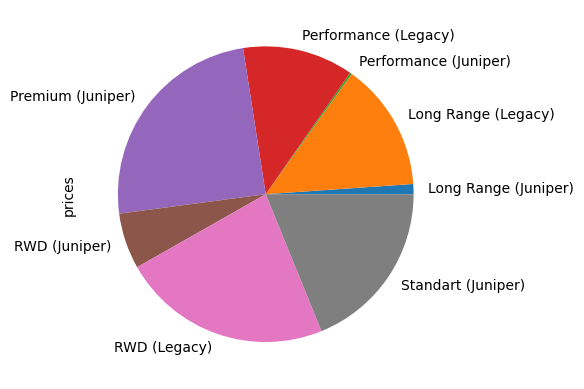

In [77]:
#Adet olarak modellerin pasta grafik dağılımı
grup["prices"].count().plot(kind="pie")
plt.show()

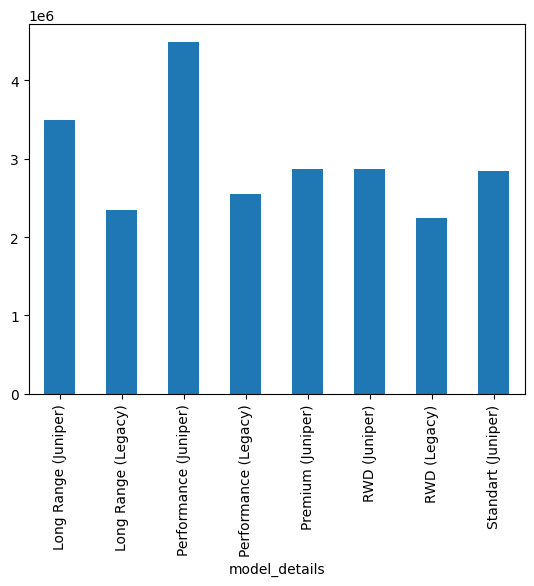

In [78]:
#Fiyat grafiği
grup["prices"].median().plot(kind="bar")
plt.show()

In [89]:
#Aggregation ile groupby fonsiyonlarını daha da çeşitlendirebiliriz.

grup = modely.groupby("model_details")

# Grupun sayısal değere sahip değişkenlerini seçiyoruz.
grup[[ 'km', 'prices']].aggregate(["min","mean","median","max","std"])
#

km                                               \
                        min          mean   median     max           std   
model_details                                                              
Long Range (Juniper)   6318  10762.181818  10000.0   20600   3922.463431   
Long Range (Legacy)       0  51918.764286  48000.0  143000  27935.996868   
Performance (Juniper)  6002   6026.000000   6026.0    6050     33.941125   
Performance (Legacy)   6001  47121.462810  45000.0  122500  25175.549871   
Premium (Juniper)      6001  10005.642276   8600.0   30000   4706.493900   
RWD (Juniper)          6001  12044.557377  10000.0   56000   7857.004118   
RWD (Legacy)           6001  27796.266376  26000.0   93500  13338.901069   
Standart (Juniper)     6001  10034.553191   7985.0   43500   5578.045087   

                        prices                                    \
                           min          mean     median      max   
model_details                                                      
Long Range (Juniper)   3138000  3.505727e+06  3500000.0  3915000   
Long Range (Legacy)    1735000  2.394442e+06  2340000.0  3500000   
Performance (Juniper)  4490000  4.492000e+06  4492000.0  4494000   
Performance (Legacy)   1795000  2.644762e+06  2550000.0  4250000   
Premium (Juniper)      2375000  2.910770e+06  2875000.0  4170000   
RWD (Juniper)          1790000  2.841918e+06  2865000.0  3200000   
RWD (Legacy)           1850000  2.262712e+06  2250000.0  2800000   
Standart (Juniper)     2217000  2.835597e+06  2850000.0  3400000   

                                      
                                 std  
model_details                         
Long Range (Juniper)   243116.881729  
Long Range (Legacy)    279782.255973  
Performance (Juniper)    2828.427125  
Performance (Legacy)   415366.659011  
Premium (Juniper)      189145.295005  
RWD (Juniper)          229500.216921  
RWD (Legacy)           123612.849576  
Standart (Juniper)     205433.108058

In [91]:
#İstenilen sütuna istenilen agg fonksiyonunu uygulayabiliriz.

grup= modely.agg({"km":"mean","prices":"median"})

grup

,0
km,2.459790e+04
prices,2.738500e+06


In [105]:
#istenilen sütuna istedğimiz fonksiyonu yada fonksiyonları uygulayabiliriz.

# İlk olarak, 'model_details' sütununa göre gruplandırma yapalım.
grup_by_model = modely.groupby('model_details')

# Ardından, 'year', 'km' ve 'prices' sütunlarına istenilen aggregation fonksiyonlarını uygulayalım.
sonuc = grup_by_model[['year','km','prices']].agg({"year":"min","km":["min","mean","max"],"prices":"median"})

# 'km' altındaki 'mean' sütununu yuvarla ve tam sayıya çevir
sonuc['km', 'mean'] = sonuc['km', 'mean'].round(0).astype(int)
# 'prices' altındaki 'median' sütununu yuvarla ve tam sayıya çevir
sonuc["prices", "median"] = sonuc["prices", "median"].round(0).astype(int)

# Sayılara binlik ayracı eklemek için formatlama
formatted_sonuc = sonuc.style.format(
    {
        ('km', 'min'): '{:,.0f}',
        ('km', 'mean'): '{:,.0f}',
        ('km', 'max'): '{:,.0f}',
        ('prices', 'median'): '{:,.0f}'
    }
)

# Biçimlendirilmiş DataFrame'i göster
formatted_sonuc

In [121]:
#kendi fonksiyonumuzu da uygulayabiliriz.

def mod(x):
  return x.max()-x.min()

In [123]:
#prices grubumuzda
grup_by_model[['km', 'prices']].agg(mod)

,km,prices
model_details,,
Long Range (Juniper),14282,777000
Long Range (Legacy),143000,1765000
Performance (Juniper),48,4000
Performance (Legacy),116499,2455000
Premium (Juniper),23999,1795000
RWD (Juniper),49999,1410000
RWD (Legacy),87499,950000
Standart (Juniper),37499,1183000


In [130]:
grup=modely.groupby(["model_details","year"])
grup_km=grup["km"]
grup_pr= grup["prices"]

In [129]:
grup_km.agg(["min","median","max",mod])

min   median     max     mod
model_details         year                                
Long Range (Juniper)  2025   6318  10000.0   20600   14282
Long Range (Legacy)   2021  96300  96300.0   96300       0
                      2022      0      0.0       0       0
                      2023   6001  48000.0  143000  136999
                      2025   6025   6025.0    6025       0
Performance (Juniper) 2025   6002   6026.0    6050      48
Performance (Legacy)  2022  20400  40595.0   45000   24600
                      2023   6001  46500.0  122500  116499
Premium (Juniper)     2025   6001   8600.0   30000   23999
RWD (Juniper)         2024  16500  21000.0   56000   39500
                      2025   6001   9925.0   31000   24999
RWD (Legacy)          2024   6001  28900.0   93500   87499
                      2025   6001  20000.0   39066   33065
Standart (Juniper)    2025   6001   7985.0   43500   37499

In [131]:
grup_pr.agg(["min","median","max",mod])

min     median      max      mod
model_details         year                                      
Long Range (Juniper)  2025  3138000  3500000.0  3915000   777000
Long Range (Legacy)   2021  2280000  2280000.0  2280000        0
                      2022  3150000  3150000.0  3150000        0
                      2023  1735000  2340000.0  3500000  1765000
                      2025  2875000  2875000.0  2875000        0
Performance (Juniper) 2025  4490000  4492000.0  4494000     4000
Performance (Legacy)  2022  2325000  2382500.0  2650000   325000
                      2023  1795000  2550000.0  4250000  2455000
Premium (Juniper)     2025  2375000  2875000.0  4170000  1795000
RWD (Juniper)         2024  1790000  2103000.0  2250000   460000
                      2025  2649999  2880000.0  3200000   550001
RWD (Legacy)          2024  1850000  2240000.0  2800000   950000
                      2025  2055000  2325000.0  2520000   465000
Standart (Juniper)    2025  2217000  2850000.0  3400000  1183000

# **Apply Metodu**

In [138]:
#parçalara ayrılmış grupların herbirine herhangi bir fonksiyon uygulamak için kullanılır.

grup= modely.groupby("citys")

grup["prices"].apply(lambda x:x.min())

,prices
citys,
Adana,2030000
Afyonkarahisar,2120000
Aksaray,2795000
Amasya,2290000
Ankara,2050000
Antalya,2125000
Aydın,2250000
Balıkesir,2050000
Bartın,2198000
